# Labs Access Analysis: 02 Stats Plot

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import os
import time
import warnings
import colorcet as cc
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
sns.set_context("poster")
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

## Data investigation

In [3]:
url_data_labs = "data/labs.csv"

In [4]:
# create the directory with the data
if not os.path.exists('data'):
    os.makedirs('data') 
# create the directory where store the svg files
if not os.path.exists('svg'):
    os.makedirs('svg') 
# create the directory with the png files
if not os.path.exists('png'):
    os.makedirs('png')

load the data

In [5]:
data = pd.read_csv(url_data_labs)

show the first 5 rows

In [6]:
data.head(5)

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes,URL 2
0,3D Incubator,Incubator-Accelerator,Barcelona,BCN,"Polígono Industrial de la, Avinguda Parc Logís...",8040.0,41.340036,2.123036,Manually added,https://www.incubator3d.org/,NaN,NaN
1,AKASHA Hub Barcelona,Hackerspace,Barcelona,BCN,"carrer de la verneda, 17 loc1",8018.0,41.411054,2.191146,Hackerspaces.org,https://wiki.hackerspaces.org/AKASHA_Hub_Barce...,NaN,NaN
2,Ateneu de Fabricació Ca L'Alier,Ateneu de Fabricació,Barcelona,BCN,"Carrer de Pere IV, 362",8019.0,41.410786,2.203873,Ajuntament.barcelona.cat,NaN,NaN,NaN
3,Ateneu de Fabricació Ciutat Meridiana,Ateneu de Fabricació,Barcelona,BCN,"Av. de Rasos de Peguera, 232",8033.0,41.460460,2.169872,Ajuntament.barcelona.cat,https://ajuntament.barcelona.cat/ateneusdefabr...,NaN,NaN
4,Ateneu de Fabricació Gràcia,Ateneu de Fabricació,Barcelona,BCN,Carrer Perill 8,8012.0,41.399364,2.161167,Ajuntament.barcelona.cat,https://ajuntament.barcelona.cat/ateneusdefabr...,NaN,NaN


### description of the fields of the dataset
|  field name | description | details   |
|---|---|---|
| Name | name of the lab | |
| Type | type of Fablab. | *Fab Lab, Service, Makerspace, DIYBio Lab, Ateneu de Fabricació, City Space, Library, FabCafè, Incubator/Accelerator. Foundation* | 
| Cluster | which cluster the lab belongs to (Barcelona or Milan) | *BCN, MI* |
| Address | The house number where the lab is located | |
| CAP | the zipcode of the address | | 
| Lat | the latitude expressed in decimal degree | | 
| Long | the longitude expressed in decimal degree | |
| Source | where the information was collected from | *fablabs.io, hackerspaces.org, makerspaces.make.co, ajuntament.barcelona.cat, sphere.diybio.org, manually added, ajuntament de Barcelona policy document* | 
| URL | the web address of the lab | | 
| Notes | some information notes.  |the only note is if the lab has been closed (*Closed*), otherwise nothing appears. | 

### data investigation

In [7]:
data["Notes"].describe()

count         11
unique         2
top       Closed
freq          10
Name: Notes, dtype: object

In [8]:
data["Notes"].value_counts()

Closed                        10
City Manufacturing network     1
Name: Notes, dtype: int64

### Analysis - Type of Labs

In [9]:
data["Type"].describe()

count          87
unique         20
top       Fab Lab
freq           18
Name: Type, dtype: object

In [10]:
data["Type"].value_counts()

Fab Lab                                                                    18
Makerspace                                                                 12
University Lab                                                              8
Barcelona Recircula – Tool Library / Repair Cafè                            7
City Space                                                                  6
Hackerspace                                                                 6
Ateneu de Fabricació                                                        5
Incubator-Accelerator                                                       4
Service                                                                     4
DIYBio Lab                                                                  3
Foundation                                                                  3
Repair Cafè                                                                 3
Library                                                         

plot the data

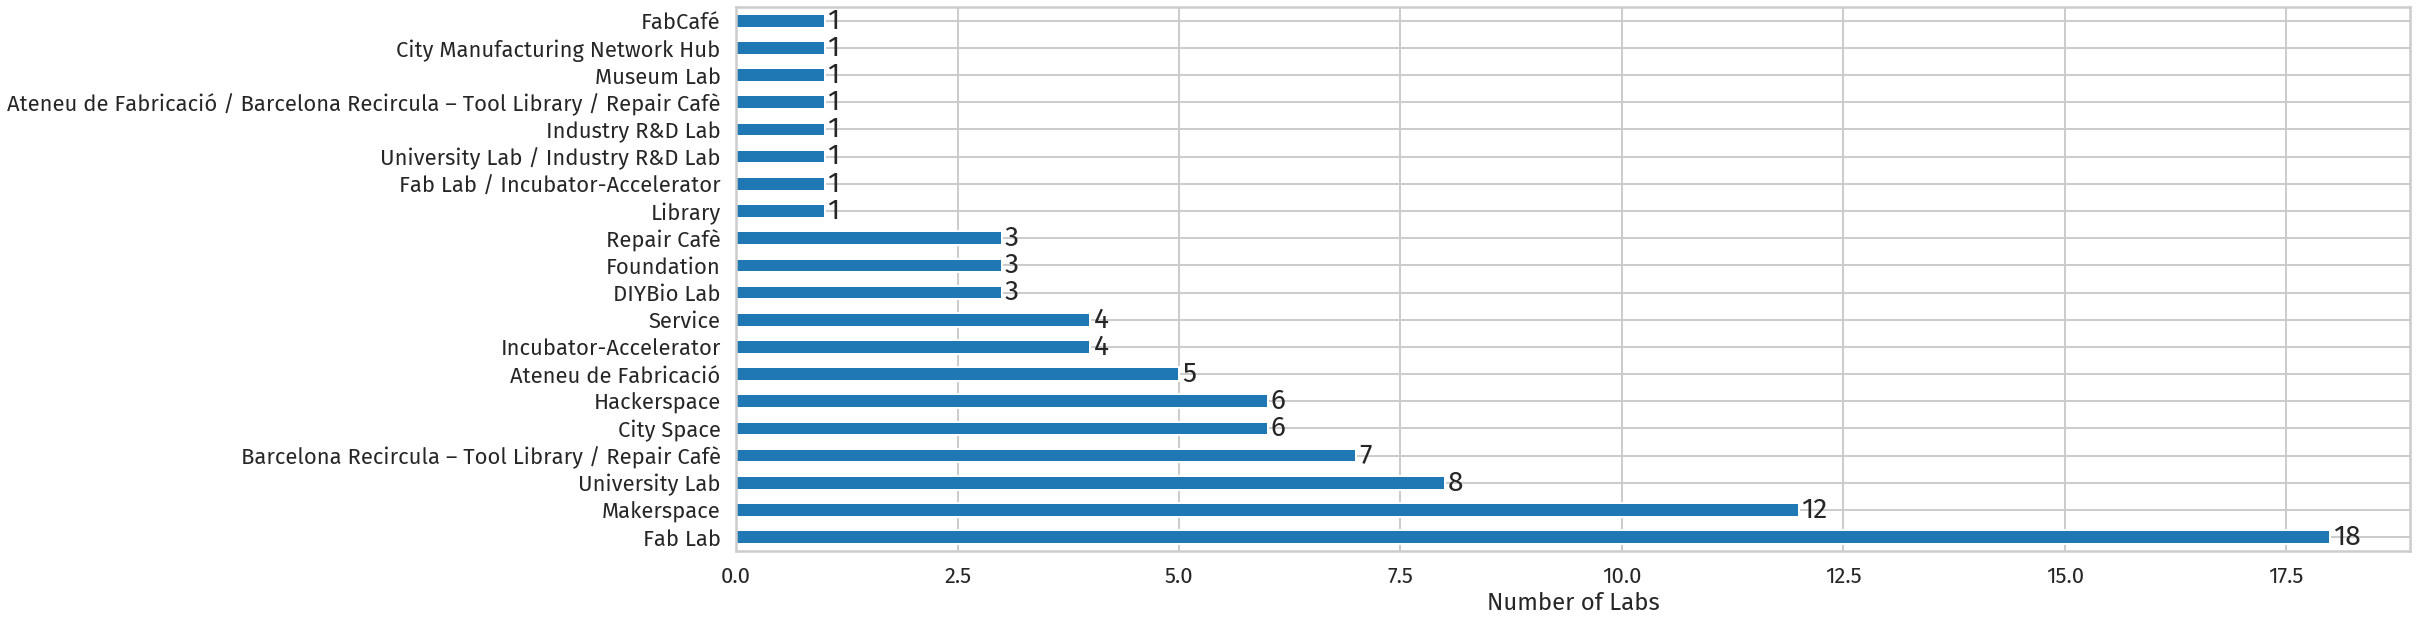

In [11]:
ax = data["Type"].value_counts().plot(kind="barh", figsize=(30,10))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Number of Labs')
plt.savefig("svg" + os.sep + "labs_type.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_type.png", dpi=300, bbox_inches="tight")

### Analysis - Cities

In [12]:
data["Cluster"].describe()

count      87
unique      2
top       BCN
freq       59
Name: Cluster, dtype: object

In [13]:
data["Cluster"].value_counts()

BCN    59
MI     28
Name: Cluster, dtype: int64

plot the data

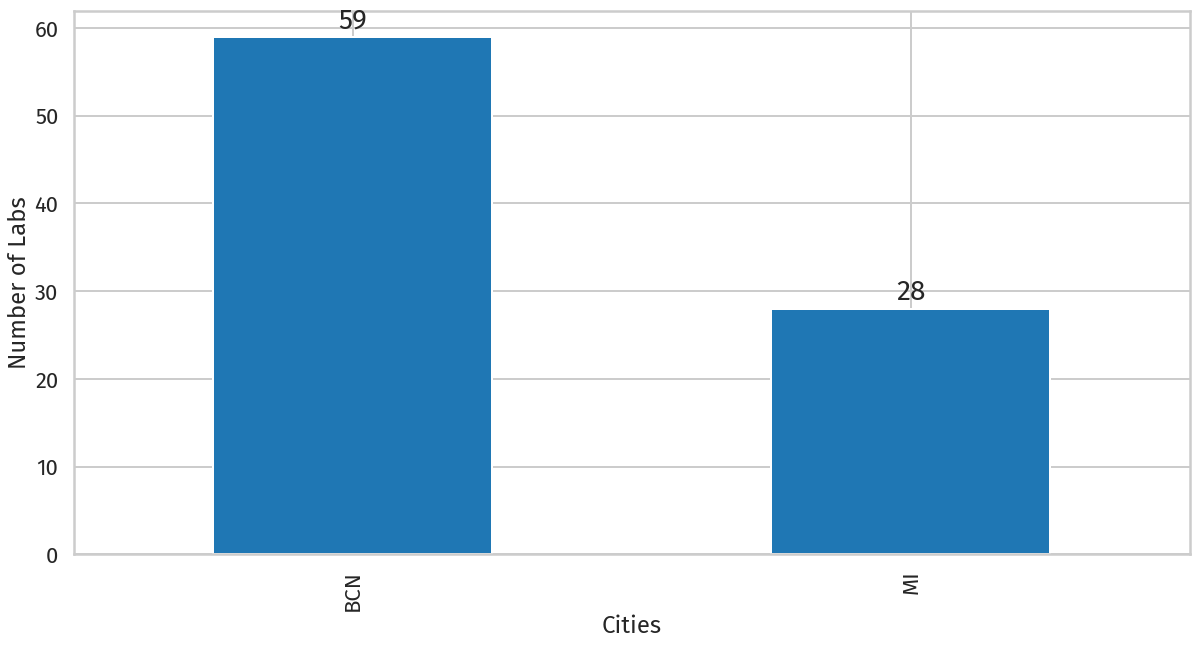

In [14]:
ax = data["Cluster"].value_counts().plot(kind="bar", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Cities')
plt.ylabel('Number of Labs')
plt.savefig("svg" + os.sep + "labs_cluster.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_cluster.png", dpi=300, bbox_inches="tight")

### Labs Type by Cluster (City)

In [15]:
gp = data.groupby('Cluster')
gp["Type"].sum()

Cluster
BCN    Incubator-AcceleratorHackerspaceAteneu de Fabr...
MI     Fab LabFab LabFab Lab / Incubator-AcceleratorF...
Name: Type, dtype: object

In [16]:
data.groupby(['Cluster','Type']).size()

Cluster  Type                                                                   
BCN      Ateneu de Fabricació                                                        5
         Ateneu de Fabricació / Barcelona Recircula – Tool Library / Repair Cafè     1
         Barcelona Recircula – Tool Library / Repair Cafè                            7
         City Space                                                                  6
         DIYBio Lab                                                                  2
         Fab Lab                                                                    11
         FabCafé                                                                     1
         Foundation                                                                  3
         Hackerspace                                                                 4
         Incubator-Accelerator                                                       4
         Industry R&D Lab                        

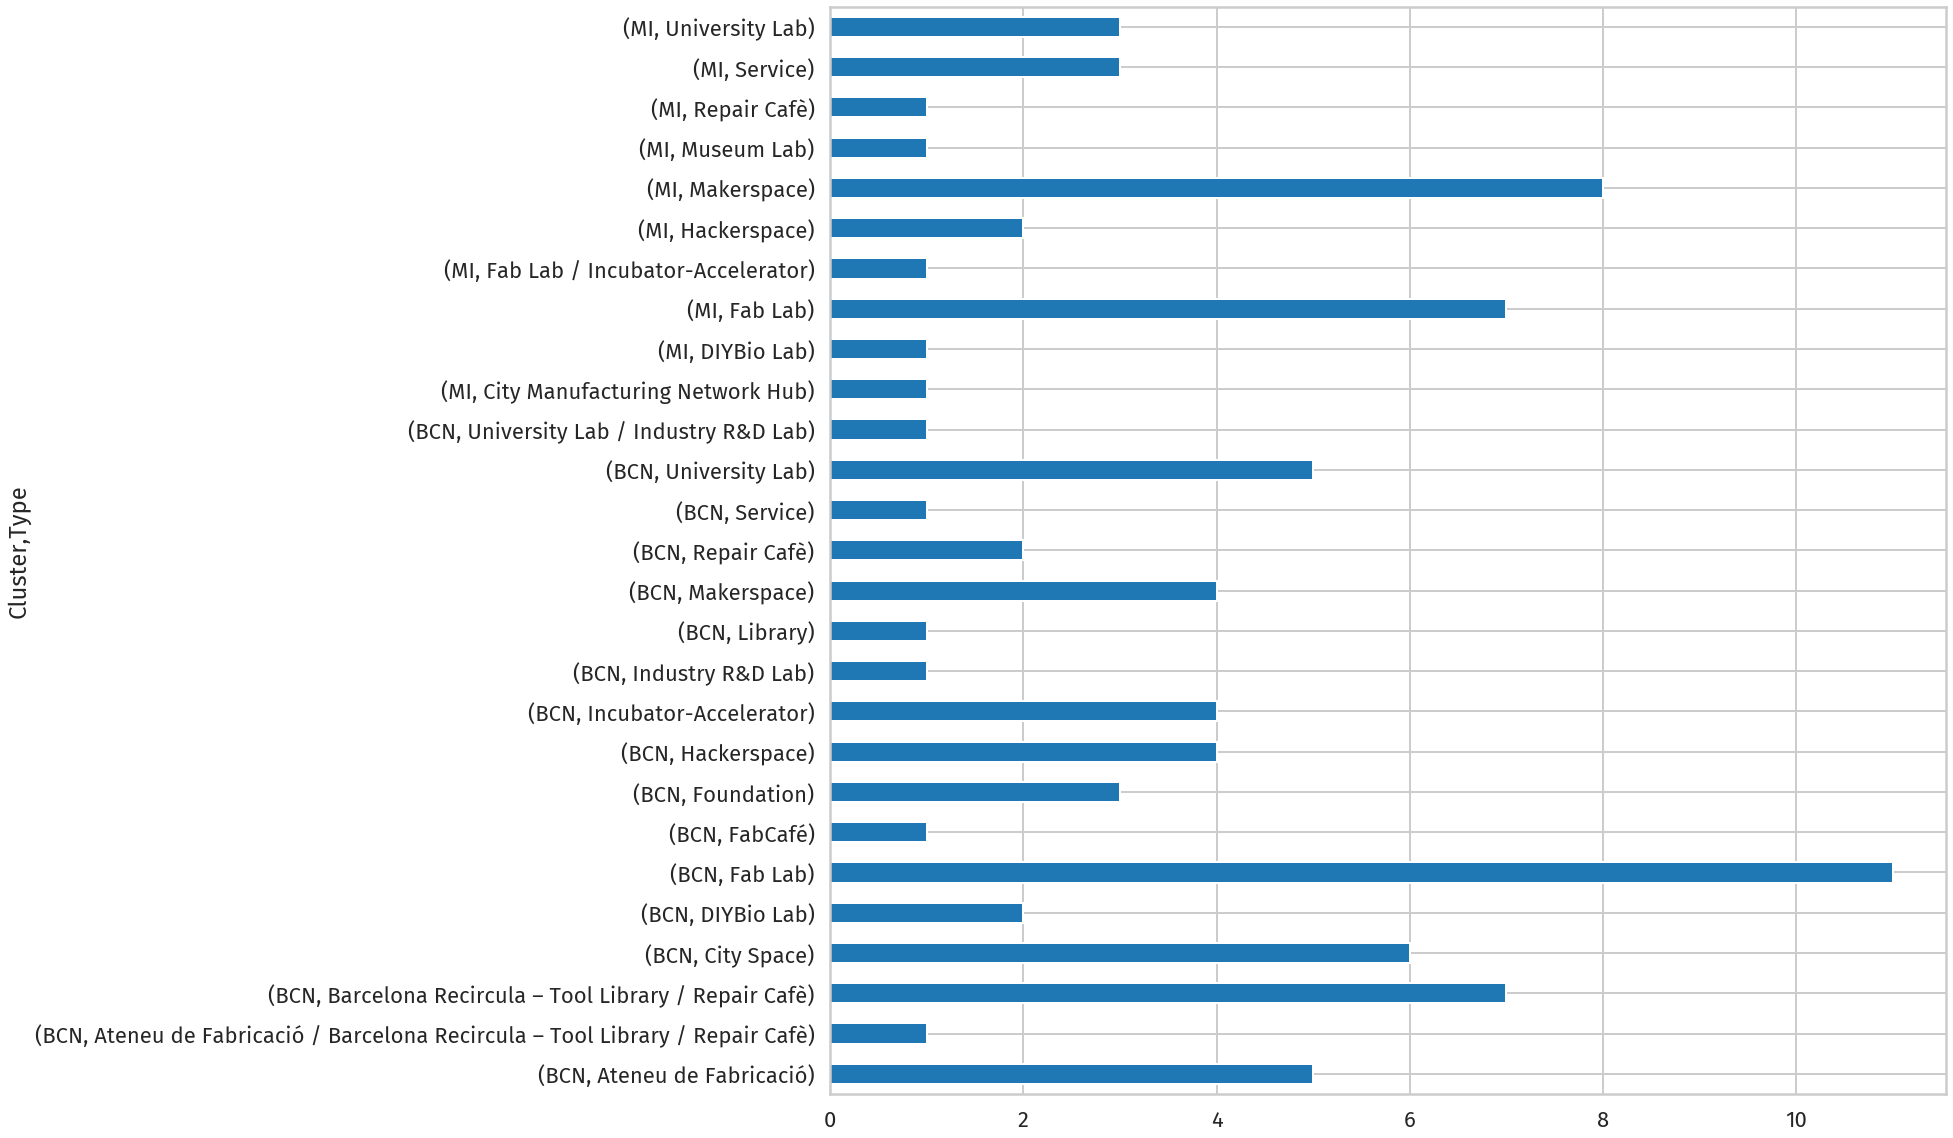

In [17]:
data.groupby(['Cluster','Type']).size().plot(kind="barh", figsize=(20,20))
plt.show()

plot the data

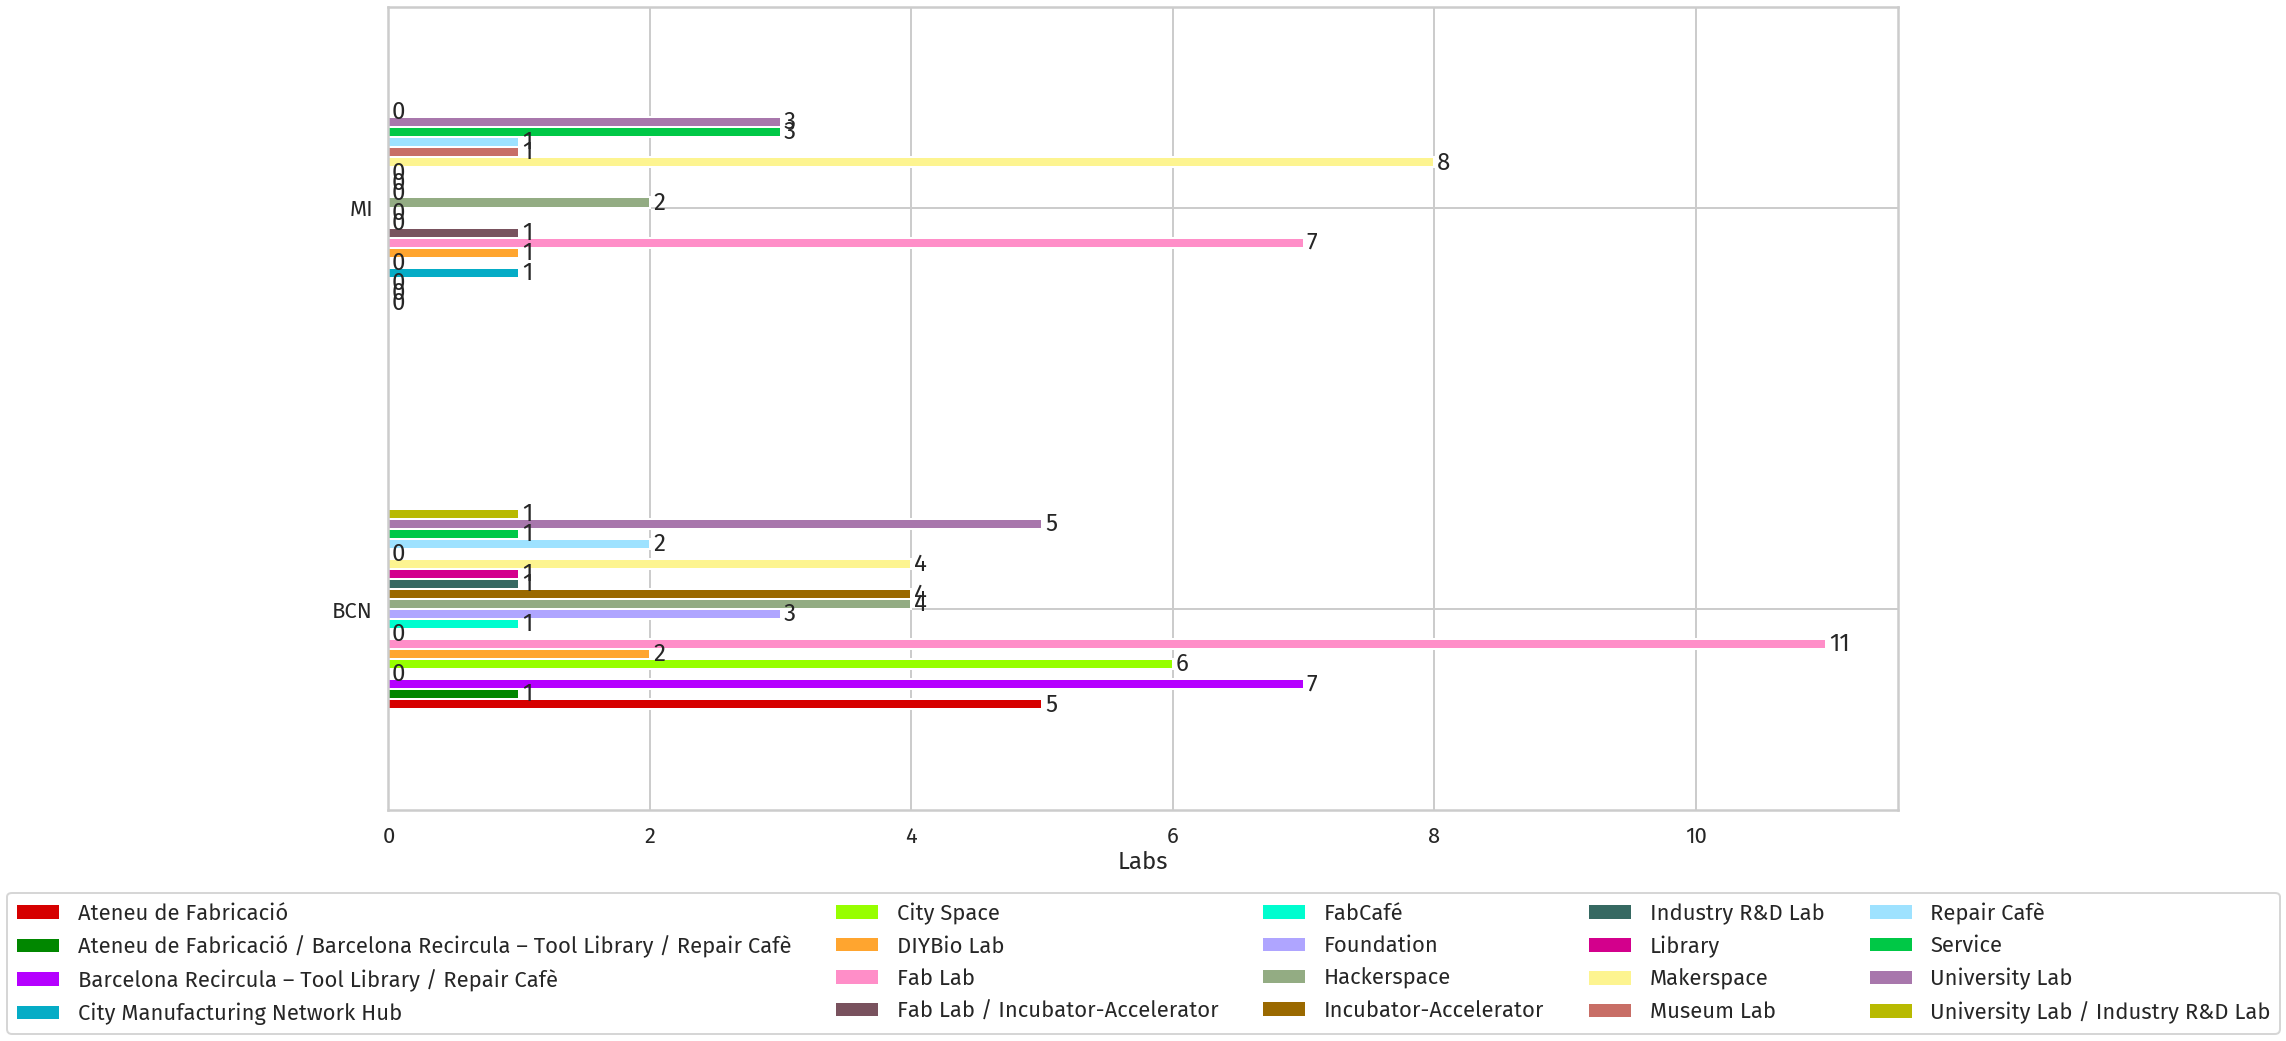

In [18]:
ax = data.groupby(['Cluster','Type']).size().unstack().plot(kind='barh', figsize=(30,15), color=sns.color_palette(cc.glasbey_light, len(data.groupby(['Cluster','Type']))))
for xx in ax.containers:
    ax.bar_label(xx, fmt="%d", size=24, padding=3)
plt.xlabel('City')
plt.xlabel('Labs')
ax.set_ylabel('')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=5)
plt.tight_layout()
plt.savefig("svg" + os.sep + "labs_cluster.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_cluster.png", dpi=300, bbox_inches="tight")

two plots together

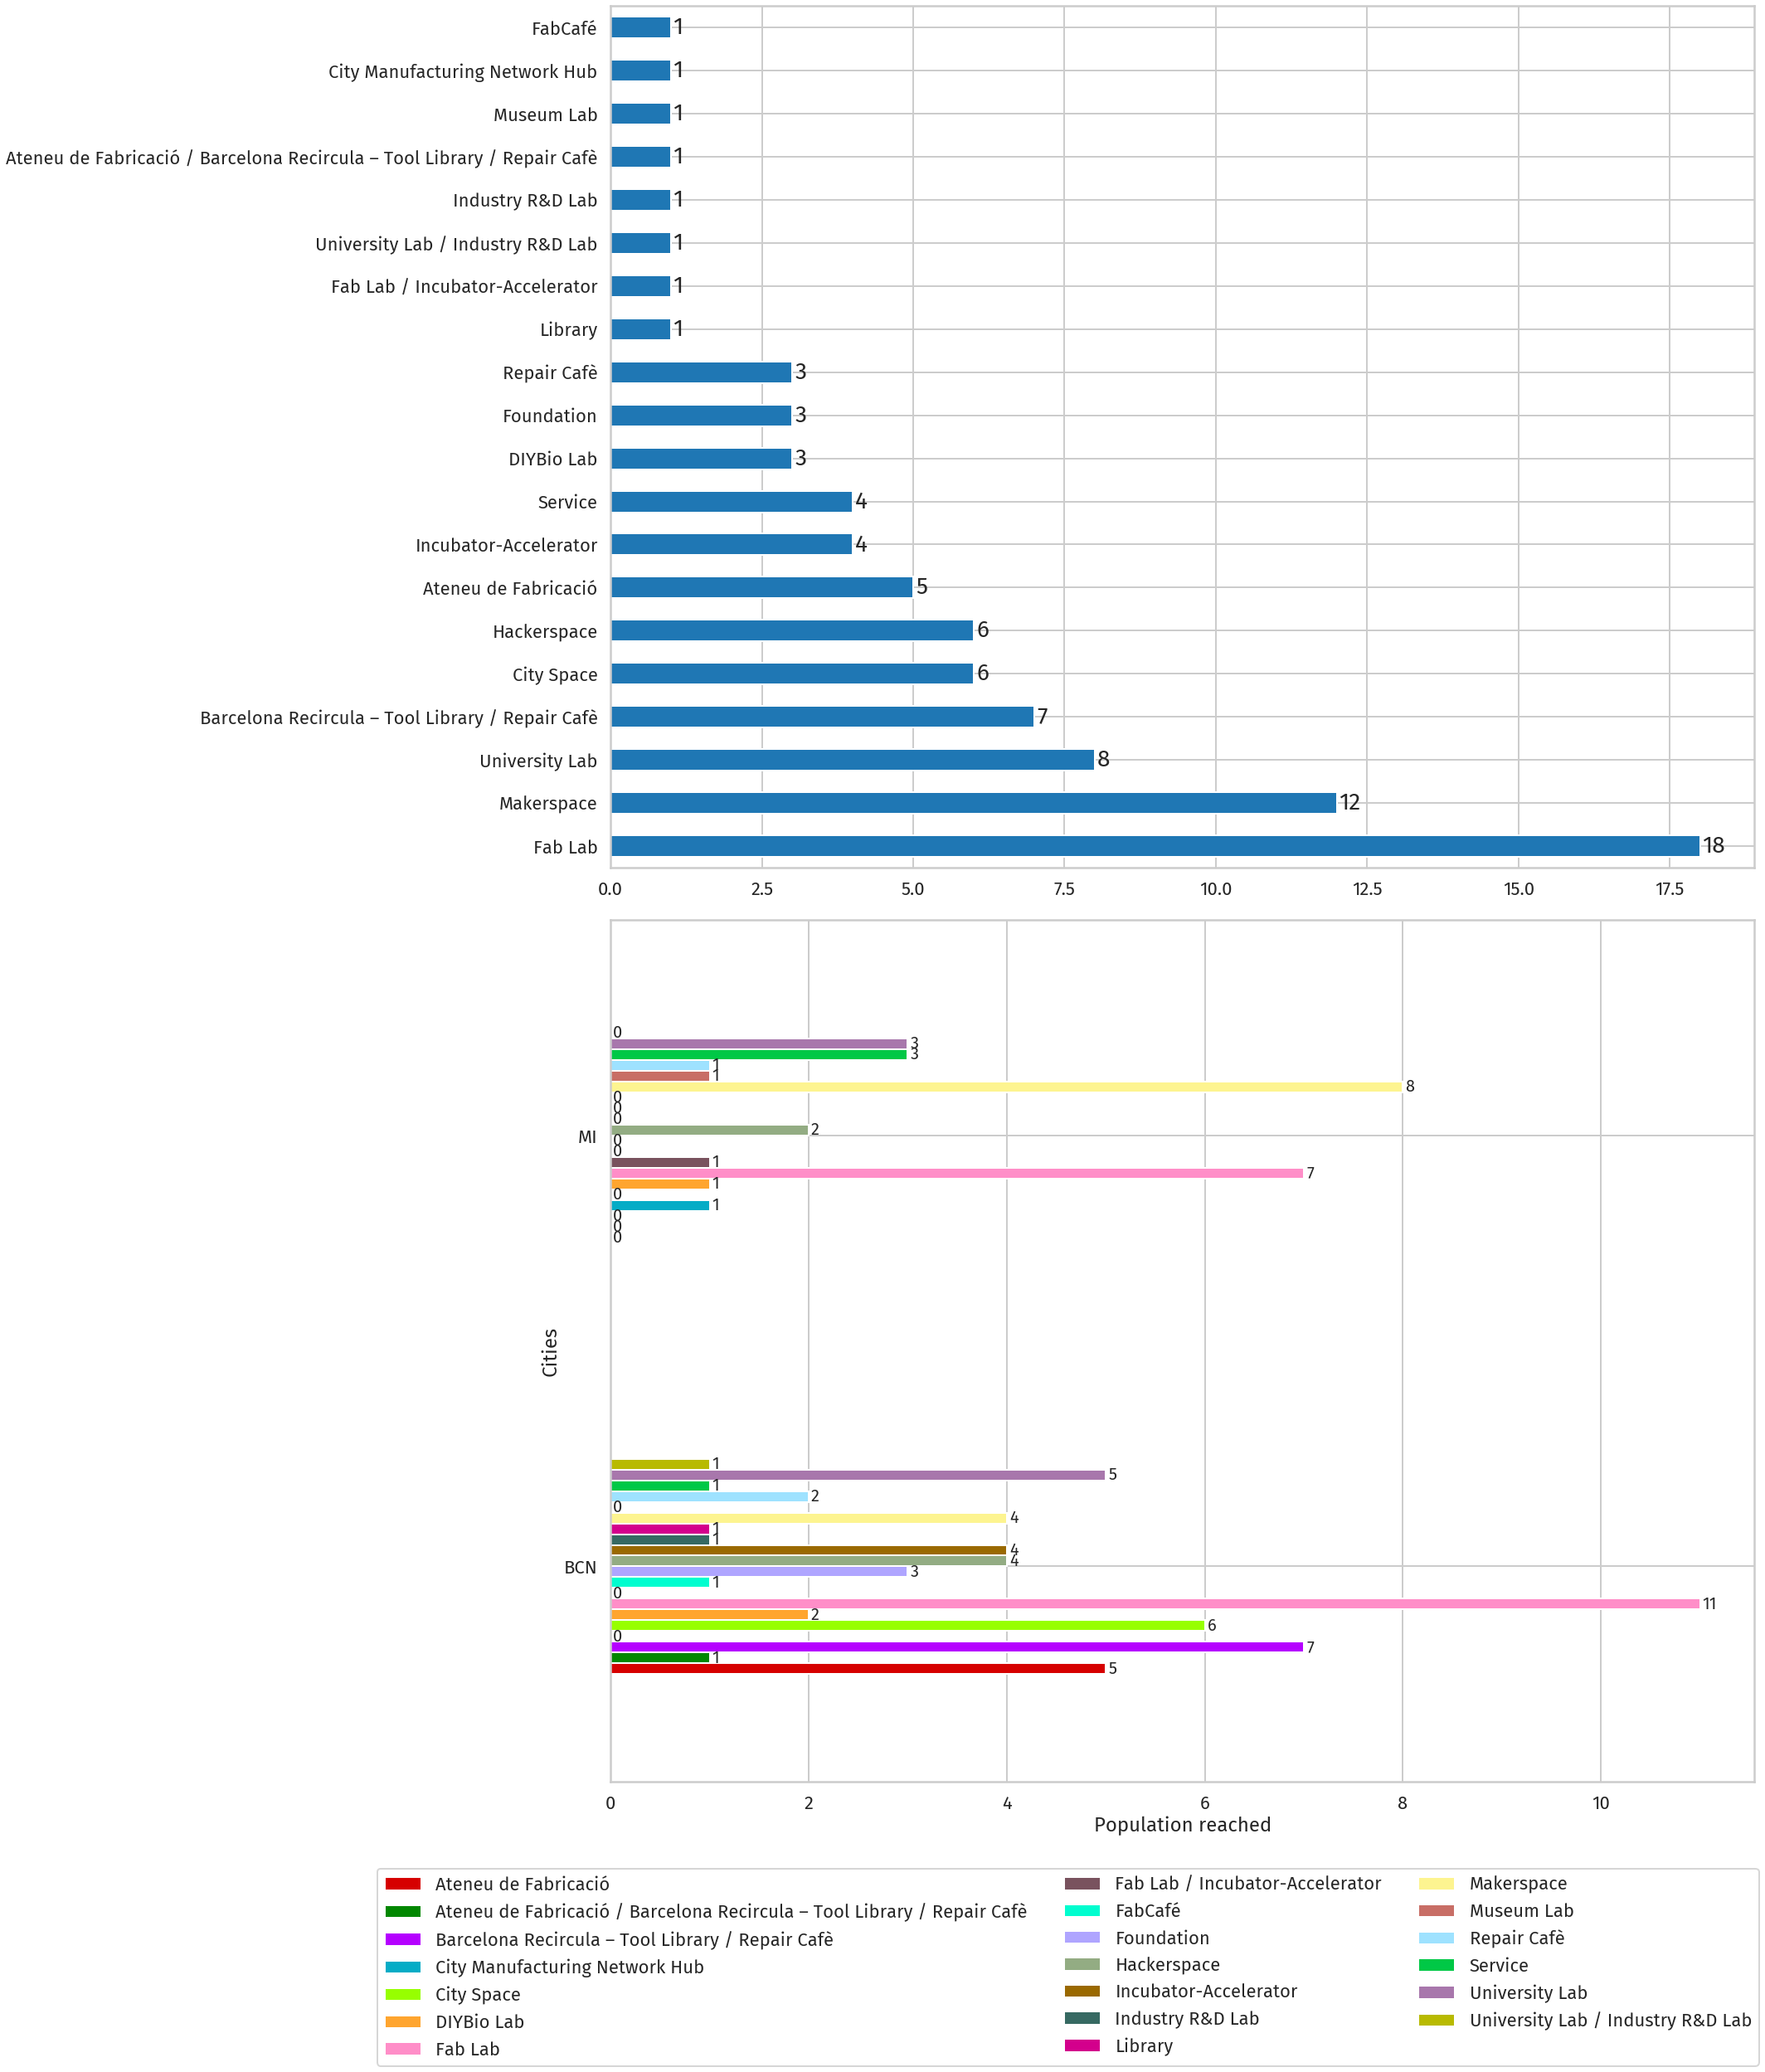

In [19]:
figure, axes = plt.subplots(2, 1, figsize=(30,35))
data["Type"].value_counts().plot(ax=axes[0], kind="barh", legend=False)
axes[0].bar_label(axes[0].containers[0], fmt="%d", size=28, padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

data.groupby(['Cluster','Type']).size().unstack().plot(ax=axes[1], kind="barh", color=sns.color_palette(cc.glasbey_light, len(data.groupby(['Cluster','Type']))))
plt.legend(loc='upper center', bbox_to_anchor=(0.4, -0.09), ncol=3)
for xx in axes[1].containers:
    axes[1].bar_label(xx, fmt="%d", size=20, padding=3)
#plt.xlabel('City')
#plt.xlabel('Labs')

axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('Cities')

#axes[1].legend(loc='upper center', bbox_to_anchor=(0.05, -0.09), ncol=5)


plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita_number_subplot.svg", bbox_inches='tight')

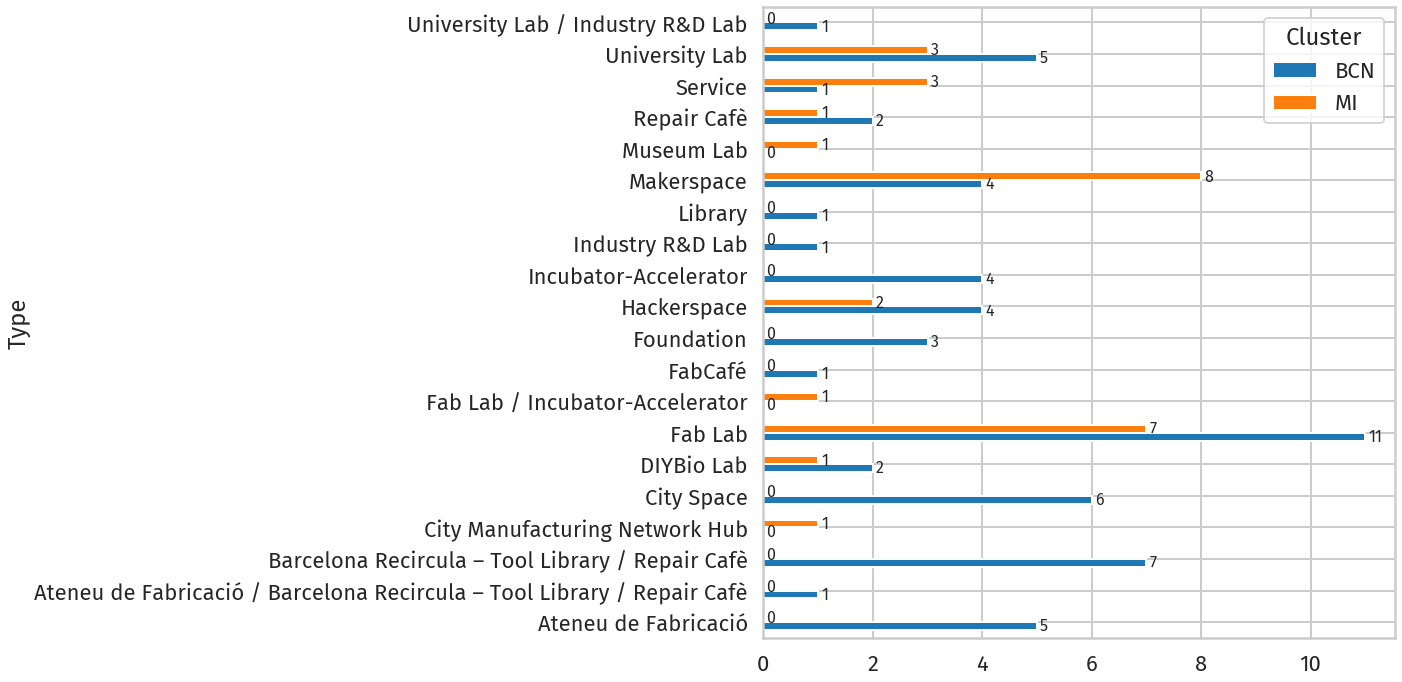

In [20]:
ax = data.groupby(['Cluster','Type']).size().unstack().T.plot(kind="barh", figsize=(20,10))
for xx in ax.containers:
    ax.bar_label(xx, fmt="%d", size=16, padding=3)
axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('Cities')

plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_together_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita_together_number_subplot.svg", bbox_inches='tight')

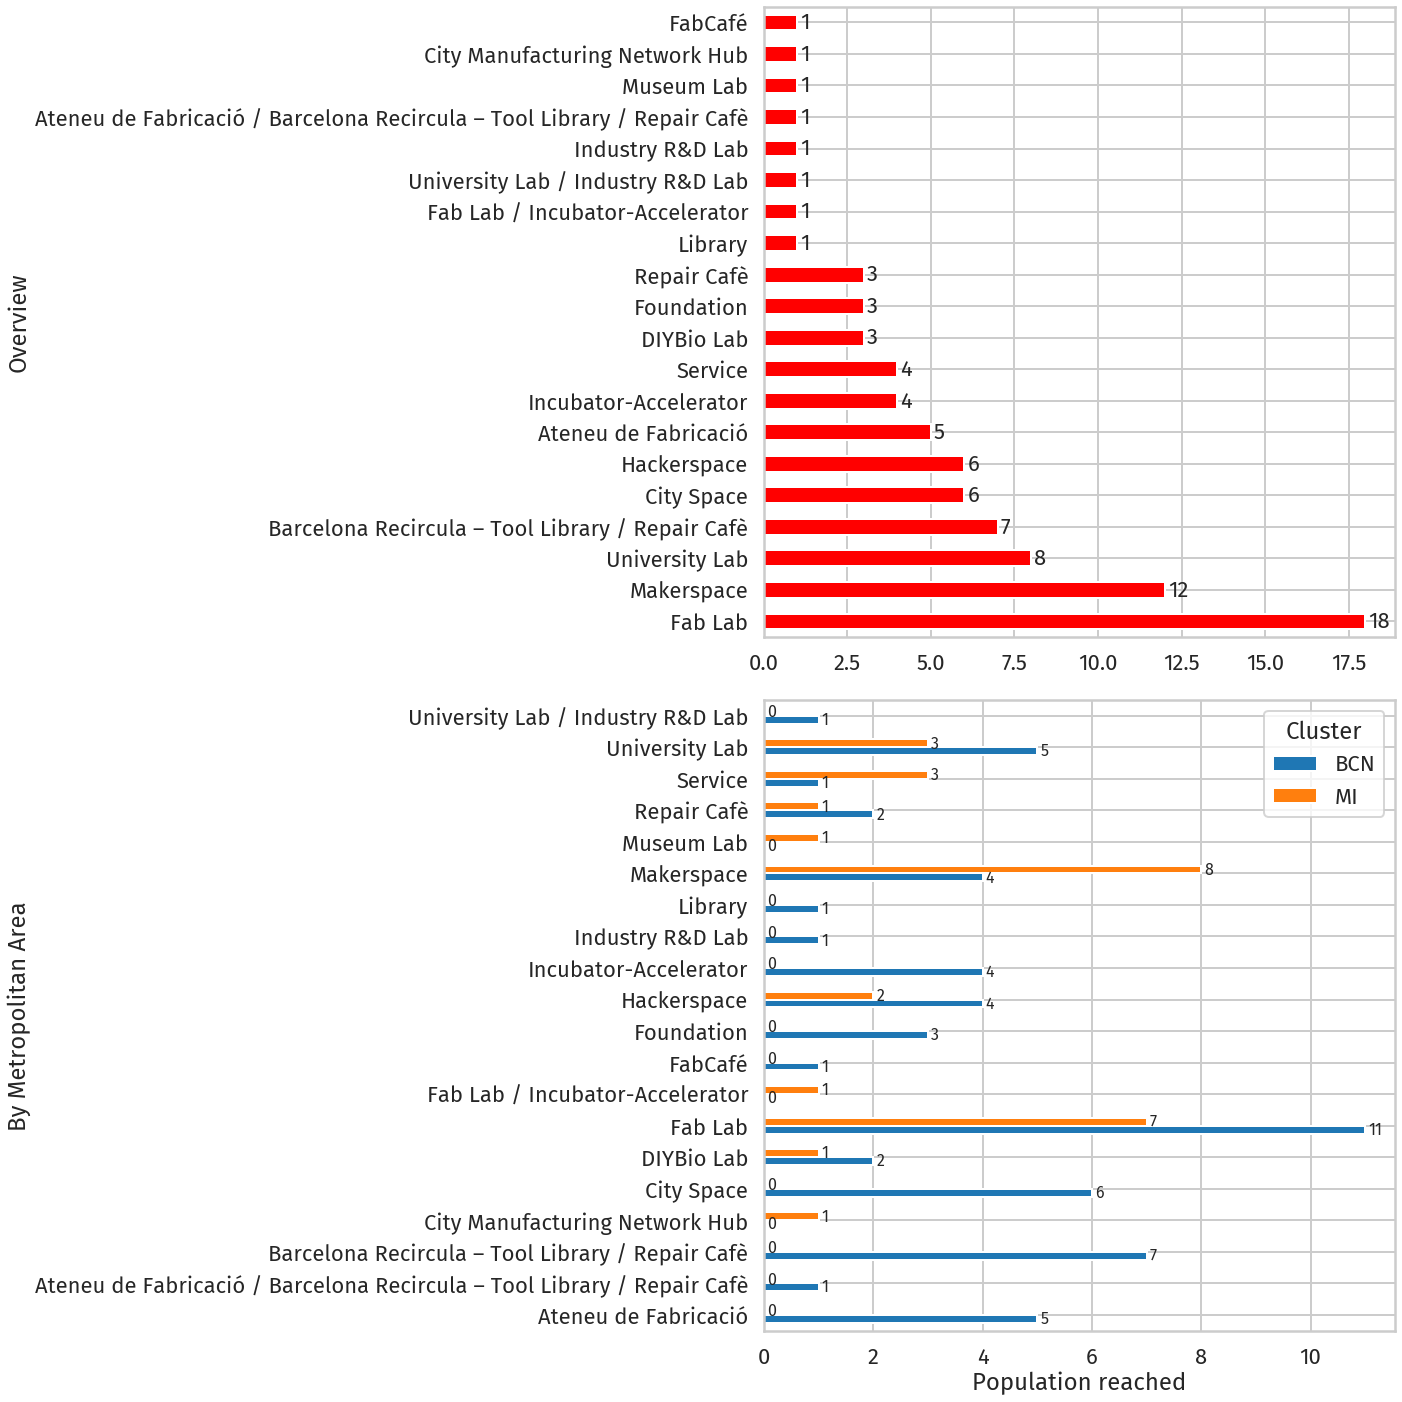

In [21]:
figure, axes = plt.subplots(2, 1, figsize=(20,20))
data["Type"].value_counts().plot(ax=axes[0], kind="barh", legend=False, color="r")
axes[0].bar_label(axes[0].containers[0], fmt="%d", size=22, padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('Overview')

ax = data.groupby(['Cluster','Type']).size().unstack().T.plot(ax=axes[1], kind="barh")
for xx in axes[1].containers:
    axes[1].bar_label(xx, fmt="%d", size=16, padding=3)

axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('By Metropolitan Area')


plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_together_overview_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita_together_overview_number_subplot.svg", bbox_inches='tight')

In [22]:
data['Source'].describe()

count                 87
unique                16
top       Manually added
freq                  24
Name: Source, dtype: object

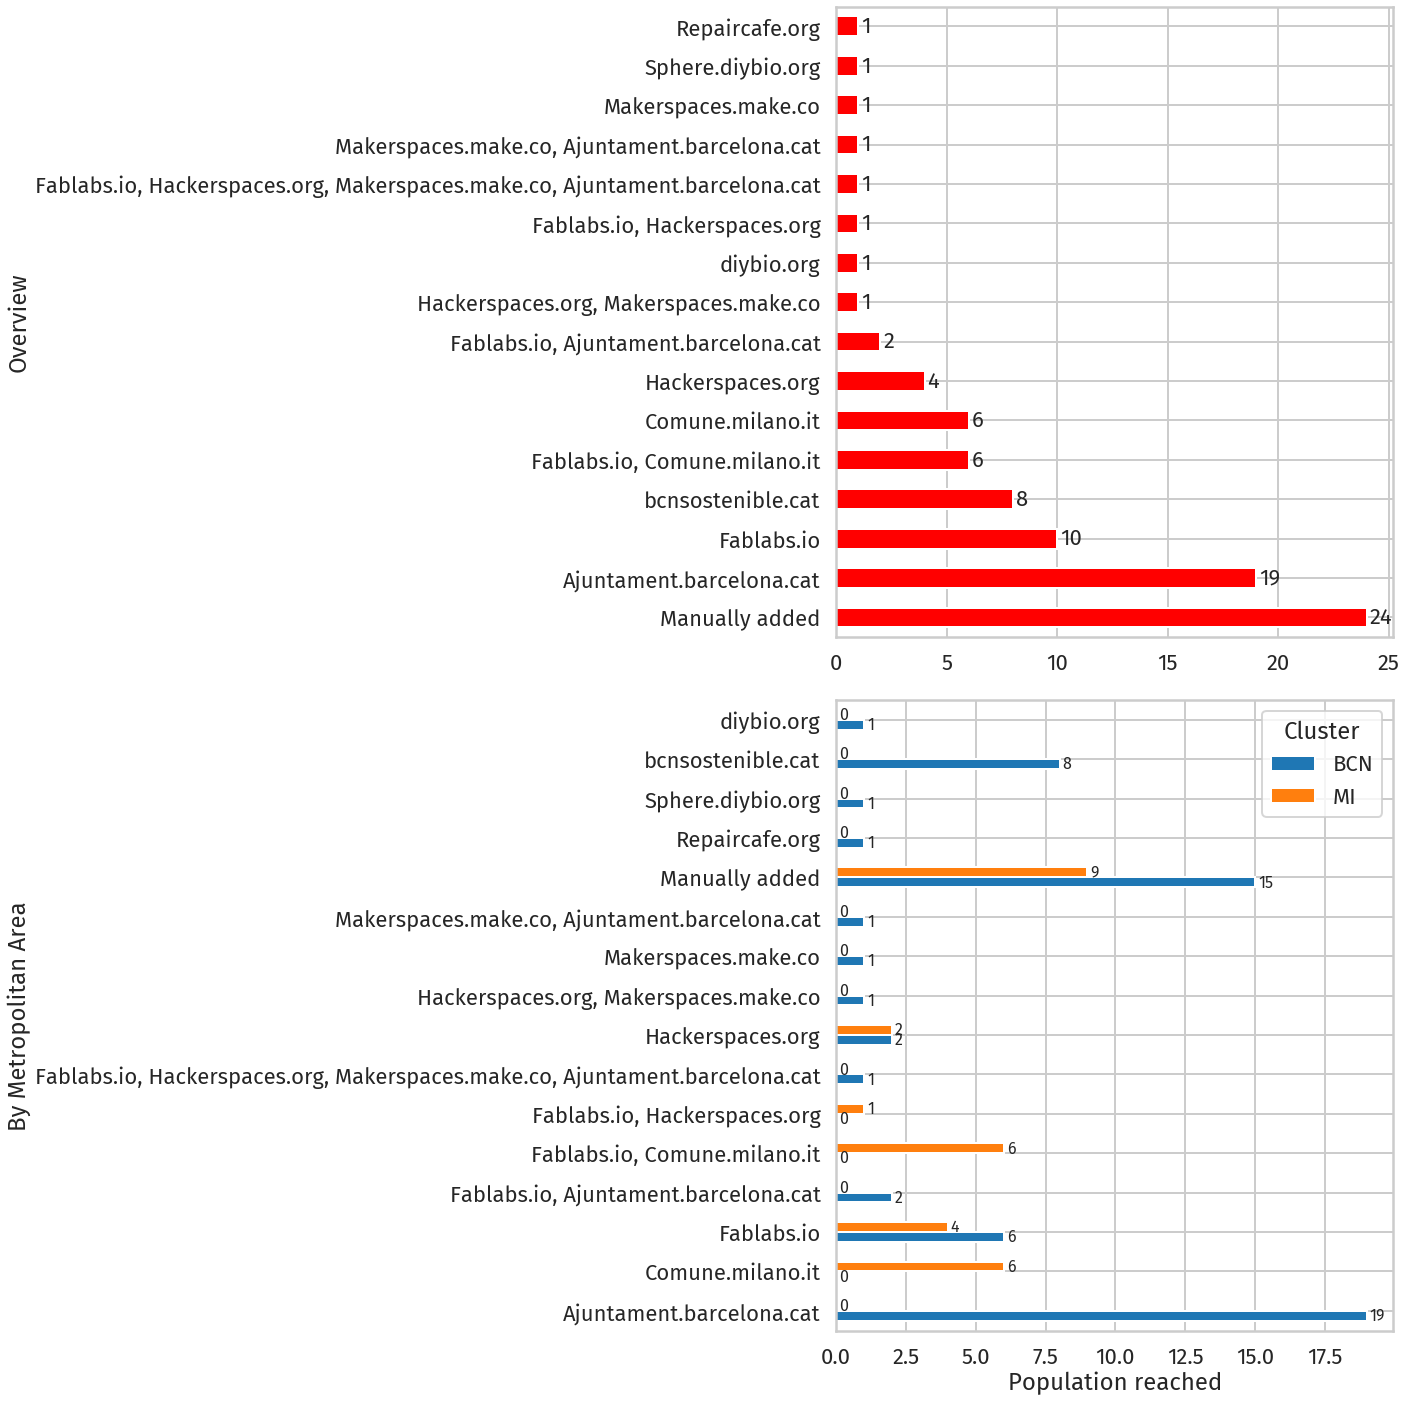

In [23]:
figure, axes = plt.subplots(2, 1, figsize=(20,20))
data["Source"].value_counts().plot(ax=axes[0], kind="barh", legend=False, color="r")
axes[0].bar_label(axes[0].containers[0], fmt="%d", size=22, padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('Overview')

ax = data.groupby(['Cluster','Source']).size().unstack().T.plot(ax=axes[1], kind="barh")
for xx in axes[1].containers:
    axes[1].bar_label(xx, fmt="%d", size=16, padding=3)

axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('By Metropolitan Area')


plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_source_together_overview_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita__source_together_overview_number_subplot.svg", bbox_inches='tight')